In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 21kB/s 
     |████████████████████████████████| 6.6MB 5.9MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101
     |████████████████████████████████| 276kB 7.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=65fb1c1ecb4ff8373a73dc384460562bce5a3335799a80012fbf711424101006
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-

In [3]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 60.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200704-cp36-none-any.whl size=41894 sha256=5fdd9926b934302f21a7a04664b7e0da85762b08ee9949e80c07f13692658d14
  Stored in directory: /root/.cache/pip/wheels/fb/d2/8e/b6d0f19811e77dabff1ebed6605ce2b59ee9f487079b434c8c
Successfully built fvcore


In [4]:
import detectron2
#from detectron2.utils.logger import setup_logger
#setup_logger()

# import some common libraries
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities

#from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
#from detectron2.data import MetadataCatalog


In [5]:
# mount your gdrive folder
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dataset1_train", {}, "/content/drive/My Drive/ML/all_May_2020/train/trainval.json", "/content/drive/My Drive/ML/all_May_2020/train/images")
register_coco_instances("dataset1_val", {}, "/content/drive/My Drive/ML/all_May_2020/val/trainval.json", "/content/drive/My Drive/ML/all_May_2020/val/images")
papers_metadata = MetadataCatalog.get("dataset1_train") #return the Metadata instance associated with this name
dataset_dicts = DatasetCatalog.get("dataset1_train") # Call the registered function and return dataset annotations


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [7]:
cfg = get_cfg() #load default config
cfg.merge_from_file('/content/drive/My Drive/ML/output/20200617T1025/train_config.yaml')
cfg.MODEL.WEIGHTS = '/content/drive/My Drive/ML/output/20200617T1025/model_final.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # set threshold for this model
cfg.DATASETS.TEST = ("dataset1_val",)
predictor = DefaultPredictor(cfg)


In [57]:
papers_metadata.thing_classes[3]

'author'

In [13]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/My Drive/ML/all_May_2020/val1/images/50111.jpeg")
outputs = predictor(im)
print(outputs)

{'instances': Instances(num_instances=2, image_height=794, image_width=596, fields=[pred_boxes: Boxes(tensor([[ 79.9110, 155.5527, 454.3166, 203.0283],
        [ 80.7288, 247.2835, 162.9762, 266.3361]], device='cuda:0')), scores: tensor([0.9987, 0.8891], device='cuda:0'), pred_classes: tensor([8, 3], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, Fals

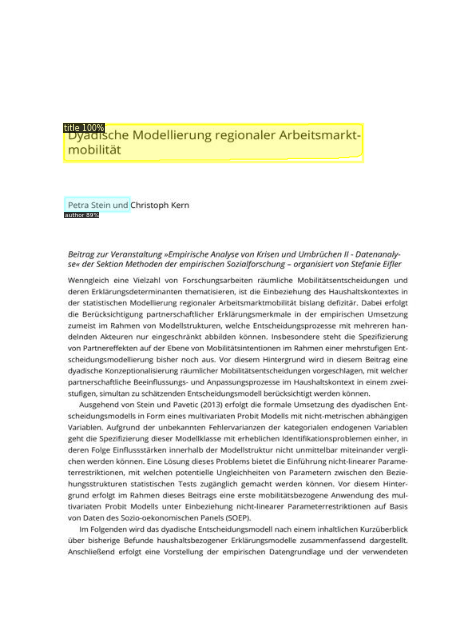

In [14]:
v = Visualizer(im[:, :, ::-1], 
               metadata= papers_metadata,
               scale=0.8, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
               )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])





In [46]:
# this function takes an image as input and return the predected classes and bounding_box in json file
import json
import re
def predic_json(image_path):
  d = {}
  d['image_name']=image_path.split('/')[-1]
  im = cv2.imread(image_path)
  outputs = predictor(im)
  d['num_instance']= outputs.get('instances').__len__()
  d['image_size']= outputs.get('instances').image_size
  d['pred_classes']=outputs.get('instances').get("pred_classes").tolist()
  d['pred_boxes']= outputs.get('instances').get("pred_boxes").tensor.tolist()
  d['accuracy-score']=outputs.get('instances').get("scores").tolist()
  r = json.dumps(d)
  with open('/content/drive/My Drive/ML/data.json', 'w') as fp:
     json.dump(d, fp, sort_keys=True, indent=4)
  return d
  

In [48]:
output= predic_json("/content/drive/My Drive/ML/all_May_2020/val1/images/50111.jpeg")
print(output)

{'image_name': '50111.jpeg', 'num_instance': 2, 'image_size': (794, 596), 'pred_classes': [8, 3], 'pred_boxes': [[79.91097259521484, 155.55267333984375, 454.31658935546875, 203.02828979492188], [80.72883605957031, 247.28347778320312, 162.9761962890625, 266.3360595703125]], 'accuracy-score': [0.9987263083457947, 0.8891356587409973]}
